In [56]:
# 多项式回归

#1# 准备数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 超参数
COLS_X = 'encode_weight_305price'
COLS_Y = 'amount'
COLS_ALL = ['date', 'amount', 'refuelLiters', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'holidays', 'encoded_wc_night', 'code_week', 'encoded_holidays', '305_price','encode_label_305price','encode_weight_305price','313_price' ]

# VAULE_Y = 'amount'
import pandas as pd

# 读取excel文件并获取指定列
df = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL, encoding='GBK')
print(df.tail())

           date  order_cnt       amount  refuelLiters text_day text_night  \
359  2023-12-26    1072045  335929197.6   44738960.24        阴         多云   
360  2023-12-27    1054896  332618128.4   44334481.65       多云          晴   
361  2023-12-28    1032115  323028612.7   42986493.14        晴         多云   
362  2023-12-29    1218840  372592734.2   49432247.01       多云         小雨   
363  2023-12-30    1126207  341635923.3   45312200.19        阴          晴   

     high  low wc_day wd_day  ... encoded_wc_night  wd_night week code_week  \
359     9    0   3~4级     东风  ...                1        东风  星期二         2   
360    12    0    <3级    西北风  ...                0        北风  星期三         3   
361    12    3   3~4级     北风  ...                0        东风  星期四         4   
362    12    5   3~4级    东南风  ...                0       东南风  星期五         5   
363    14    1    <3级    西南风  ...                2       西北风  星期六         6   

     holidays encoded_holidays  305_price  encode_label_305pri

In [57]:
# 创建多项式特征
poly_features = PolynomialFeatures(degree=2)
x = df[COLS_X].values.reshape(-1, 1)
y = df[COLS_Y].values

# 拟合多项式回归模型
X_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

In [58]:
# 计算性能指标
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 54839514.92298186
R2: 0.19637082458727673


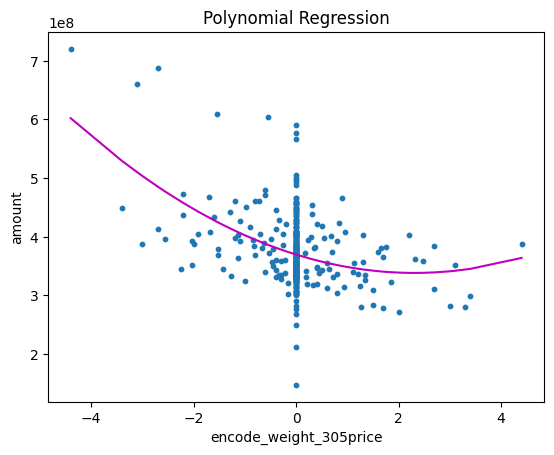

In [59]:
# 可视化数据和回归曲线
import operator
plt.scatter(x, y, s=10)
# 排序 X 值以便绘制曲线
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.xlabel(COLS_X)
plt.ylabel(COLS_Y)
plt.title('Polynomial Regression')
plt.show()